# 1 Анализ результатов линейной регрессии

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Пример 1

Пусть нам заданы 1000 точек.

In [17]:
np.random.seed(1)
x = np.random.rand(100, 1)*10
y = 1000 + 7 * np.sin(x) + 2 * np.random.randn(100, 1)

d = {'x': x.reshape(1,100)[0], 'y': y.reshape(1,100)[0]}
df = pd.DataFrame(data=d)
df['y'] = df['y']*100
df.head()

,x,y
0,4.170220,99463.512913
1,7.203245,100152.506176
2,0.001144,99939.559821
3,3.023326,100248.188922
4,1.467559,100742.291971


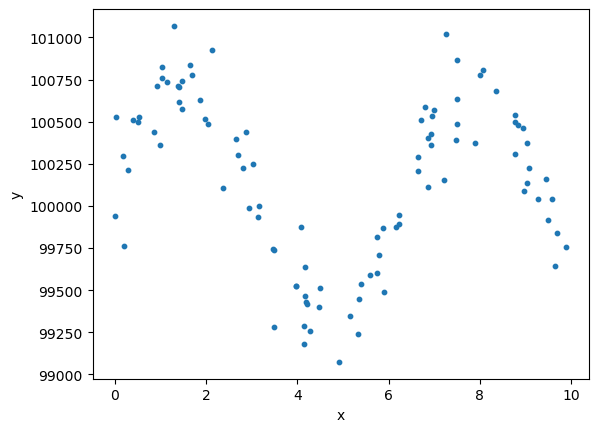

In [18]:
plt.scatter(df['x'], df['y'], s=10)
df = df.sort_values('x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Так как нужно найти более оптимальную модель, и мы видим, что график похож на график синуса, то сразу добавим переменную `sin(x)`.

In [19]:
df['x2'] = df['x'].apply(lambda x: np.sin(x))

In [21]:
df['x3'] = np.sin(df['x']) # можно и так и это менее нагружает процессор
df

,x,y,x2,x3
2,0.001144,99939.559821,0.001144,0.001144
98,0.028703,100525.754672,0.028699,0.028699
38,0.182883,100296.537646,0.181865,0.181865
50,0.193670,99763.126437,0.192461,0.192461
14,0.273876,100213.689708,0.270465,0.270465
...,...,...,...,...
91,9.494893,99916.019333,-0.070057,-0.070057
32,9.578895,100040.655717,-0.153508,-0.153508
87,9.648400,99645.360267,-0.221763,-0.221763
21,9.682616,99836.974719,-0.254990,-0.254990


Построим модель линейной регресии, используя две переменных: `x` и `x2`.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
train, test = train_test_split(df, train_size=0.7, random_state=123)

In [24]:
model = LinearRegression()
model.fit(train[['x', 'x2']], train[['y']])

LinearRegression()

In [25]:
train = train.sort_values('x')

In [26]:
y_predict_train = model.predict(train[['x', 'x2']])
y_predict_test = model.predict(test[['x', 'x2']])

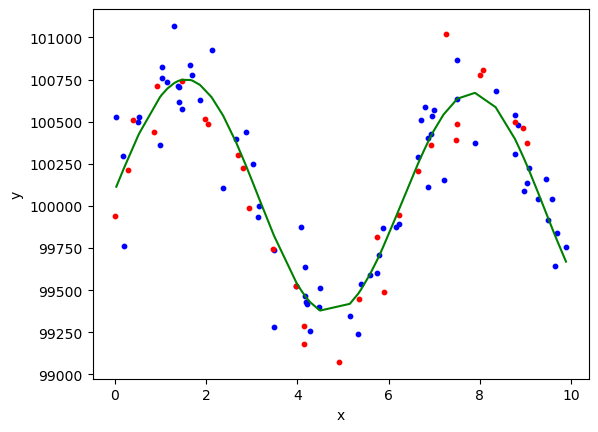

In [27]:
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.plot(train['x'], y_predict_train, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Видим, что график достаточно хорошо описывает наши данные. Оценим качество.

In [28]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train[['y']], y_predict_train)
test_mse = mean_squared_error(test[['y']], y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 33866.90457353728
Test MSE: 30186.842411013953


In [29]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train[['y']], y_predict_train)
test_mae = mean_absolute_error(test[['y']], y_predict_test)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 136.9744751764634
Test MAE: 143.81944576471628


Дополнительно, чтобы определить, насколько адекватна построенная модель, сравним имеющиеся реальные значения `y` и предсказанные значения `y_predict`.

In [30]:
train['y_predict_train'] = y_predict_train

In [31]:
residual = train['y'] - train['y_predict_train']

Итак, мы посчитали остатки. Ещё раз проговорим, что остатки (residual) — это разница между фактическим целевым значением и спрогнозированным значением.

Построим график остатков регресии.

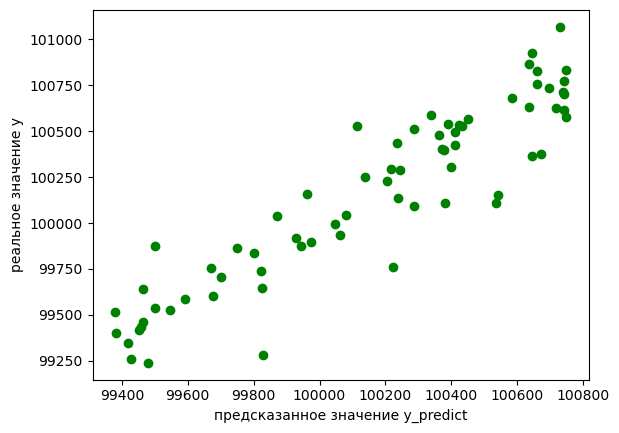

In [32]:
plt.scatter(train['y_predict_train'], train['y'], c='g')
plt.xlabel('предсказанное значение y_predict')
plt.ylabel('реальное значение y')
plt.show()

Чем сильнее точки «не укладываются» в прямую, тем несостоятельнее линейная регрессия. В нашем случае всё хорошо.

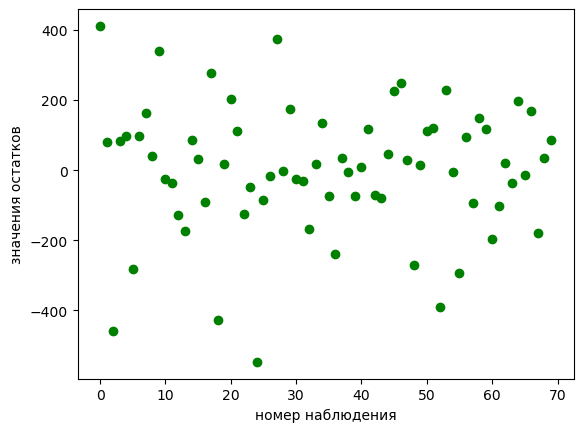

In [33]:
plt.scatter(list(range(len(y_predict_train))), residual, c='g')
plt.xlabel('номер наблюдения')
plt.ylabel('значения остатков')
plt.show()

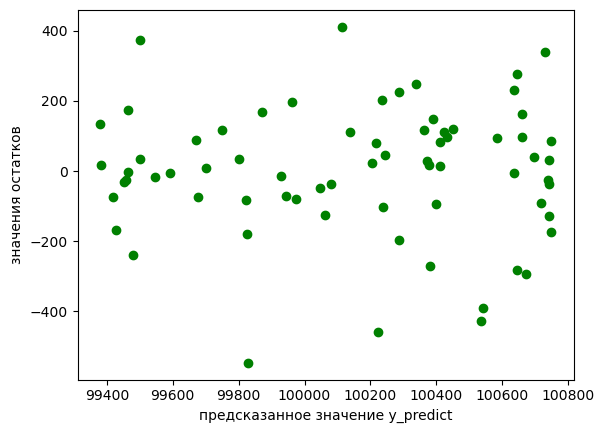

In [34]:
plt.scatter(train['y_predict_train'], residual, c='g')
plt.xlabel('предсказанное значение y_predict')
plt.ylabel('значения остатков')
plt.show()

Также часто остатки нормализуют. Сама по себе нормализация ничего дополнительного про данные не говорит. Однако это преобразование позволяет привести к «общему знаменателю» разные переменные. То есть это преобразование ничего нам не говорит про конкретный набор данных, но позволяет сравнивать разные наборы данных. Воспользуемся для нормализации функцией `preprocessing.normalize`.

In [35]:
from sklearn import preprocessing
normalized_residual = preprocessing.normalize([residual])

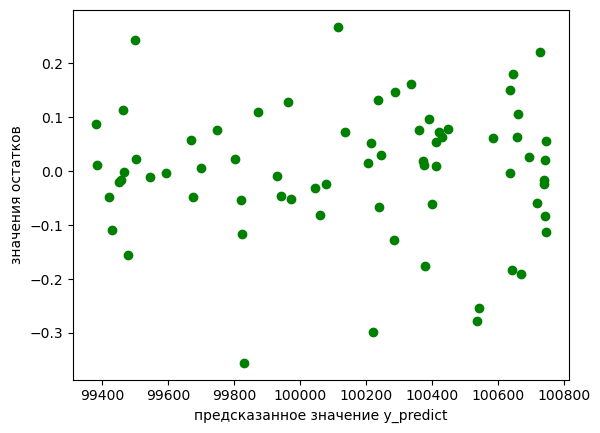

In [36]:
plt.scatter(train['y_predict_train'], normalized_residual, c='g')
plt.xlabel('предсказанное значение y_predict')
plt.ylabel('значения остатков')
plt.show()

Итак, мы получили госмоскедастичность: используя визуальный анализ, не получается найти какие-то признаки непостоянства дисперсии.

## Пример 2

Посмотрим, что произошло бы, будь наша модель изначально хуже. Воспользуемся для предсказания только переменной `x`.

In [44]:
model2 = LinearRegression()
model2.fit(train[['x']], train[['y']])

LinearRegression()

In [45]:
train = train.sort_values('x')

In [46]:
y_predict_train2 = model2.predict(train[['x']])
y_predict_test2 = model2.predict(test[['x']])

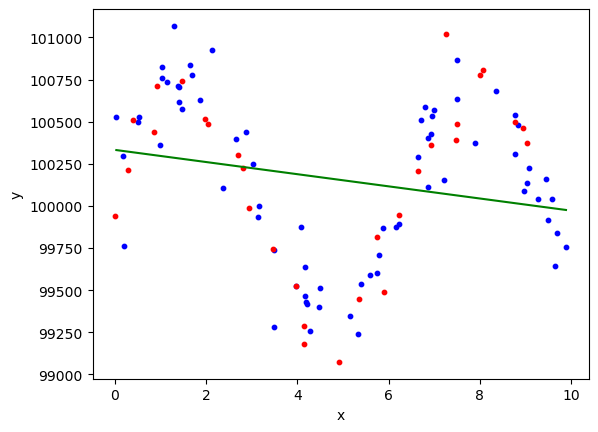

In [47]:
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.plot(train['x'], y_predict_train2, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Видим, что график предсказываемых значений не описывает наши данные. Оценим качество.

In [48]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train[['y']], y_predict_train2)
test_mse = mean_squared_error(test[['y']], y_predict_test2)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 218901.26595963057
Test MSE: 279220.9446880964


In [49]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train[['y']], y_predict_train2)
test_mae = mean_absolute_error(test[['y']], y_predict_test2)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 399.7572667931292
Test MAE: 442.83102230530835


Очевидно, что и качество модели получилось хуже. Посмотрим на графики остатков модели в этом случае.

In [50]:
train['y_predict_train2'] = y_predict_train2

In [51]:
residual2 = train['y'] - train['y_predict_train2']

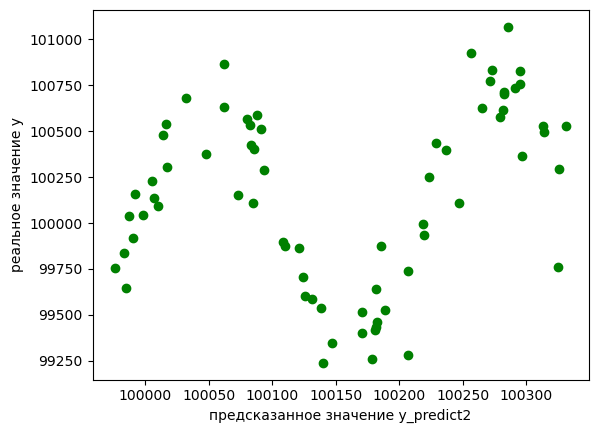

In [52]:
plt.scatter(train['y_predict_train2'], train['y'], c='g')
plt.xlabel('предсказанное значение y_predict2')
plt.ylabel('реальное значение y')
plt.show()

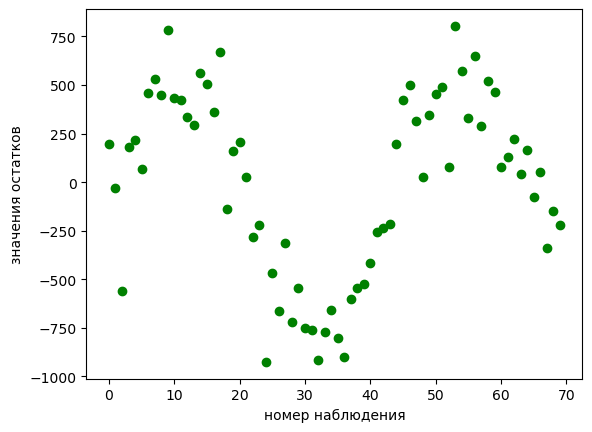

In [53]:
plt.scatter(list(range(len(y_predict_train2))), residual2, c='g')
plt.xlabel('номер наблюдения')
plt.ylabel('значения остатков')
plt.show()

Чем сильнее точки «не укладываются» в прямую, тем несостоятельнее линейная регрессия. В этом случае всё плохо, потому что мы не уловили саму зависимость моделью: теперь и ошибки модели имеют зависимость, это гетероскедастичность.

## Коэффициент детерминации

Для упрощения расчётов импортируем библиотеку.

In [54]:
from sklearn.metrics import r2_score

#### Для модели 1

In [55]:
residual = train['y'] - train['y_predict_train']
total = train['y'] - train['y'].mean()

train_r2 = 1 - sum(residual.apply(lambda x: x**2))/sum(total.apply(lambda x: x**2))
print("Train R2: {}".format(train_r2))

Train R2: 0.8530723309127273


Или напрямую из модели.

In [56]:
model.score(train[['x', 'x2']], train[['y']])

0.8530723309127273

Или с помощью `sklearn`.

In [57]:
train_r2 = r2_score(train[['y']], y_predict_train)
test_r2 = r2_score(test[['y']], y_predict_test)
print("Train R2: {}".format(train_r2))
print("Test R2: {}".format(test_r2))

Train R2: 0.8530723309127273
Test R2: 0.8832999207738184


Получили коэффициент детерминации выше 0.8. А значит, можно признать модель достаточно хорошей.

#### Для модели 2

In [58]:
train_r2 = r2_score(train[['y']], y_predict_train2)
test_r2 = r2_score(test[['y']], y_predict_test2)
print("Train R2: {}".format(train_r2))
print("Test R2: {}".format(test_r2))

Train R2: 0.05032204233885762
Test R2: -0.07944732751581718


Если R2=0, значит мы рассчитали просто среднее значение y. Из чего, в свою очередь, следует, что модель получилась не очень удачной. А если R2<0, то выходит, что разработанная вами модель даёт прогноз даже хуже, чем простое усреднение. И нужно более внимательно исследовать данные.

In [59]:
!pip install music21

## Не в тему, но... вывод музыки

In [65]:
import pygame
from music21 import *

# Создание новой песни
song = stream.Stream()

# Создание нот и добавлениехю
notes =[60, 64, 69, 67, 64, 60]
for note_value in notes:
    n = note.Note()
    n.pitch.midi = note_value
    song.append(n)

# Сохранение песни в MIDI-файл
song.write('midi', 'melody.mid')

# Инициализация Pygame
pygame.init()

# Загрузка MIDI-фай
pygame.mixer.music.load('melody.mid')

# Воспроизведение мелодии
pygame.mixer.music.play()

# Ожидание окончания воспроизведения
while pygame.mixer.music.get_busy():
    continue

# Освобождение ресурсов Pygame
pygame.quit()


In [177]:
import pygame
from music21 import *

# Создание новой песни
song = stream.Stream()

# Создание нот и добавление их в песню
notes = [
    # Верхний припев
    'G', 'A', 'B', 'C', 'D', 'E', 'D', 'C', 'B', 'A', 'G', 'G', 'G', 'G',
    # Нижний припев
    'E', 'E', 'E', 'E', 'E', 'D', 'D', 'D', 'D', 'D', 'C', 'C', 'C', 'C',
    # Верхний припев
    'A', 'B', 'C', 'D', 'E', 'D', 'C', 'B', 'A', 'G', 'G', 'G', 'G',
    # Нижний припев
    'E', 'E', 'E', 'E', 'E', 'D', 'D', 'D', 'D', 'D', 'C', 'C', 'C', 'C'
]

for note_name in notes:
    n = note.Note()
    n.pitch.name = note_name
    song.append(n)

# Сохранение песни в MIDI-файл
song.write('midi', 'melody.mid')

# Инициализация Pygame
pygame.init()

# Загрузка MIDI-файла
pygame.mixer.music.load('melody.mid')

# Воспроизведение мелодии
pygame.mixer.music.play()

# Ожидание окончания восроизведения
while pygame.mixer.music.get_busy():
    continue

# Освобождение ресурсов Pygame
pygame.quit()


## Ответы помощника по запросам об обнаружении гетероскедастисчности 

In [67]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# Создание случайных данных с гетероскедастичностью
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + np.random.rand(100, 1) * X

# Добавление константы к матрице X
X = sm.add_constant(X)

# Создание модели линейной регрессии
model = sm.OLS(y, X)

# Получение результатов регрессии
results = model.fit()

# Проверка наличия гетероскедастичности
het_test = het_white(results.resid, results.model.exog)

# Если p-value меньше выбранного уровня значимости (например, 0.05), то есть гетероскедастичность
if het_test[1] < 0.05:
    print("Гетероскедастичность обнаружена.")

    # Использование метода HC3 для оценки ковариационной матрицы с учетом гетероскедастичности
    cov_matrix = results.cov_HC3

    # Повторное оценивание модели с использованием скорректированной ковариационной матрицы
    corrected_results = model.fit(cov_type='HC3')

    # Получение скорректированных результатов
    print(corrected_results.summary())
else:
    print("Гетероскедастичность не обнаружена.")
    print(results.summary())


Гетероскедастичность обнаружена.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     2054.
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.49e-67
Time:                        18:22:27   Log-Likelihood:                 52.964
No. Observations:                 100   AIC:                            -101.9
Df Residuals:                      98   BIC:                            -96.72
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.02

Гетероскедастичность обнаружена.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     2054.
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.49e-67
Time:                        18:29:48   Log-Likelihood:                 52.964
No. Observations:                 100   AIC:                            -101.9
Df Residuals:                      98   BIC:                            -96.72
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.02

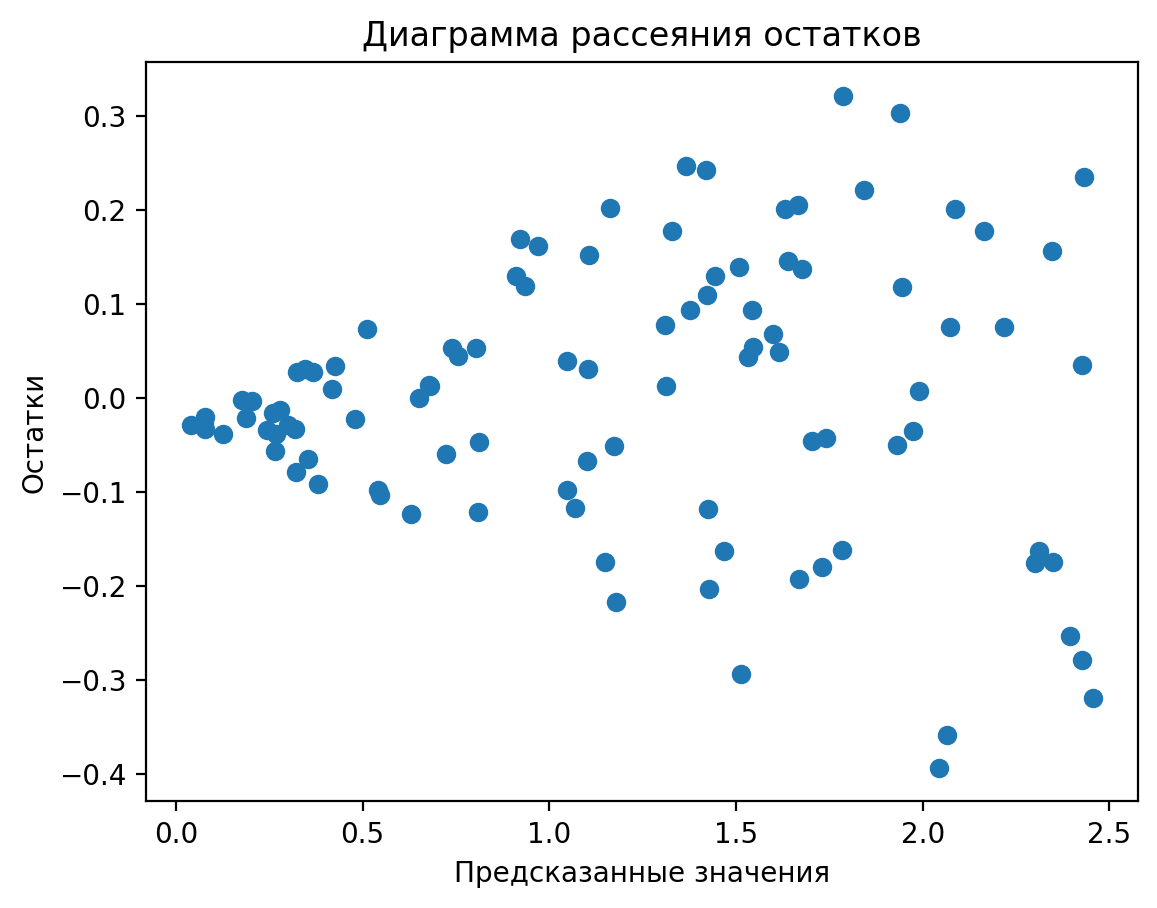

In [68]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_white

# Создание случайных данных с гетероскедастичностью
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + np.random.rand(100, 1) * X

# Добавление константы к матрице X
X = sm.add_constant(X)

# Создание модели линейной регрессии
model = sm.OLS(y, X)

# Получение результатов регрессии
results = model.fit()

# Проверка наличия гетероскедастичности
het_test = het_white(results.resid, results.model.exog)

# Если p-value меньше выбранного уровня значимости (например, 0.05), то есть гетероскедастичность
if het_test[1] < 0.05:
    print("Гетероскедастичность обнаружена.")

    # Использование метода HC3 для оценки ковариационной матрицы с учетом гетероскедастичности
    cov_matrix = results.cov_HC3

    # Повторное оценивание модели с использованием скорректированной ковариационной матрицы
    corrected_results = model.fit(cov_type='HC3')

    # Получение скорректированных результатов
    print(corrected_results.summary())

    # Визуализация гетероскедастичности
    plt.scatter(results.fittedvalues, results.resid)
    plt.xlabel("Предсказанные значения")
    plt.ylabel("Остатки")
    plt.title("Диаграмма рассеяния остатков")
    plt.show()
else:
    print("Гетероскедастичность не обнаружена.")
    print(results.summary())


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            WLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     7431.
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           3.30e-94
Time:                        18:29:54   Log-Likelihood:                 94.999
No. Observations:                 100   AIC:                            -186.0
Df Residuals:                      98   BIC:                            -180.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.253      0.8

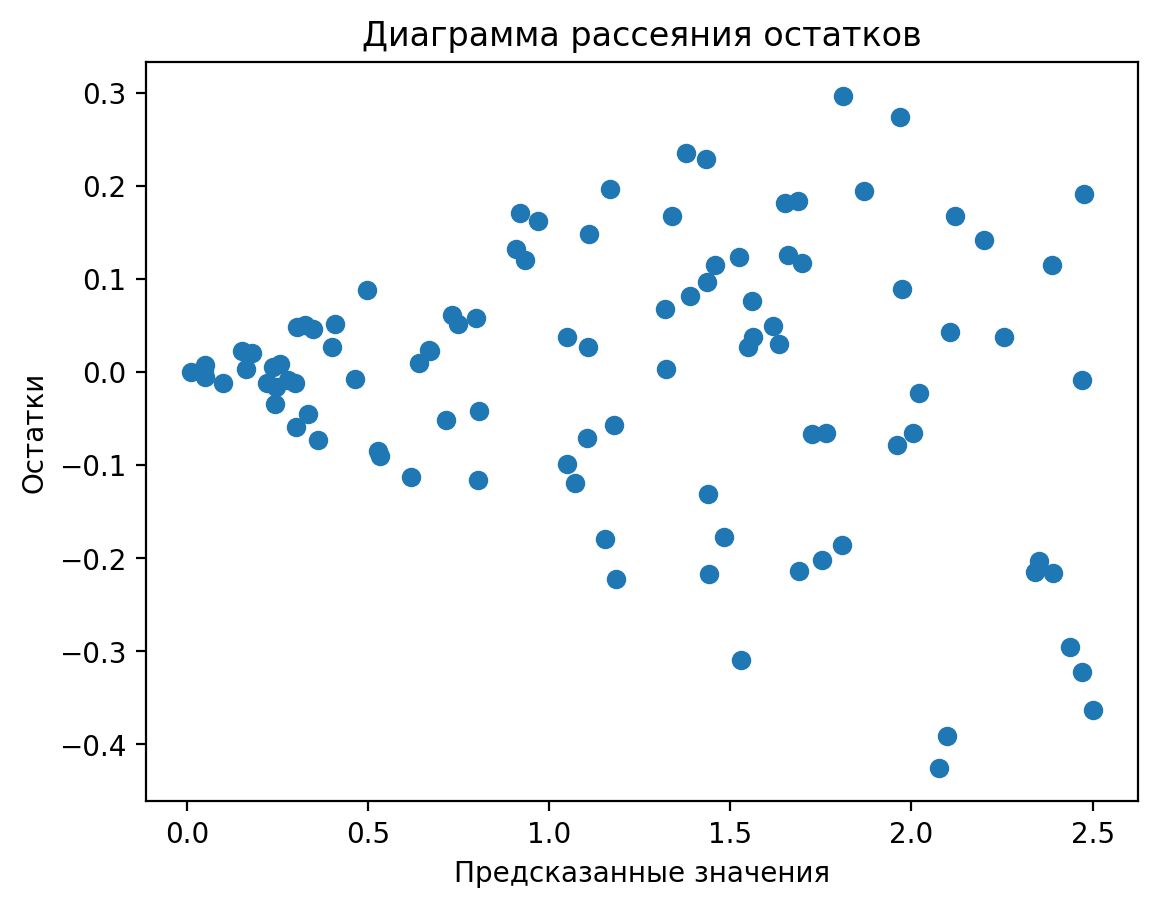

In [69]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Создание случайных данных с гетероскедастичностью
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + np.random.rand(100, 1) * X

# Добавление константы к матрице X
X = sm.add_constant(X)

# Создание модели линейной регрессии с весами
model = sm.WLS(y, X, weights=1/np.square(X[:, 1]))

# Получение результатов регрессии
results = model.fit()

# Вывод результатов
print(results.summary())

# Визуализация гетероскедастичности
residuals = results.resid
fitted_values = results.fittedvalues

plt.scatter(fitted_values, residuals)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("Диаграмма рассеяния остатков")
plt.show()


In [70]:
import numpy as np
import statsmodels.api as sm

# Создание случайных данных с гетероскедастичностью
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + np.random.rand(100, 1) * X

# Добавление константы к матрице X
X = sm.add_constant(X)

# Создание модели линейной регрессии с весами
model = sm.WLS(y, X, weights=1/np.square(X[:, 1]))

# Получение результатов регрессии
results = model.fit()

# Вывод результатов
print(results.summary())


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            WLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     7431.
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           3.30e-94
Time:                        18:30:21   Log-Likelihood:                 94.999
No. Observations:                 100   AIC:                            -186.0
Df Residuals:                      98   BIC:                            -180.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.253      0.8

In [71]:
import numpy as np
import statsmodels.api as sm

# Создание случайных данных с гетероскедастичностью
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + np.random.rand(100, 1) * X

# Добавление константы к матрице X
X = sm.add_constant(X)

# Создание модели линейной регрессии
model = sm.OLS(y, X)

# Получение результатов регрессии
results = model.fit(cov_type='HC3')

# Вывод результатов
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     2054.
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.49e-67
Time:                        18:30:26   Log-Likelihood:                 52.964
No. Observations:                 100   AIC:                            -101.9
Df Residuals:                      98   BIC:                            -96.72
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0290      0.018      1.615      0.1

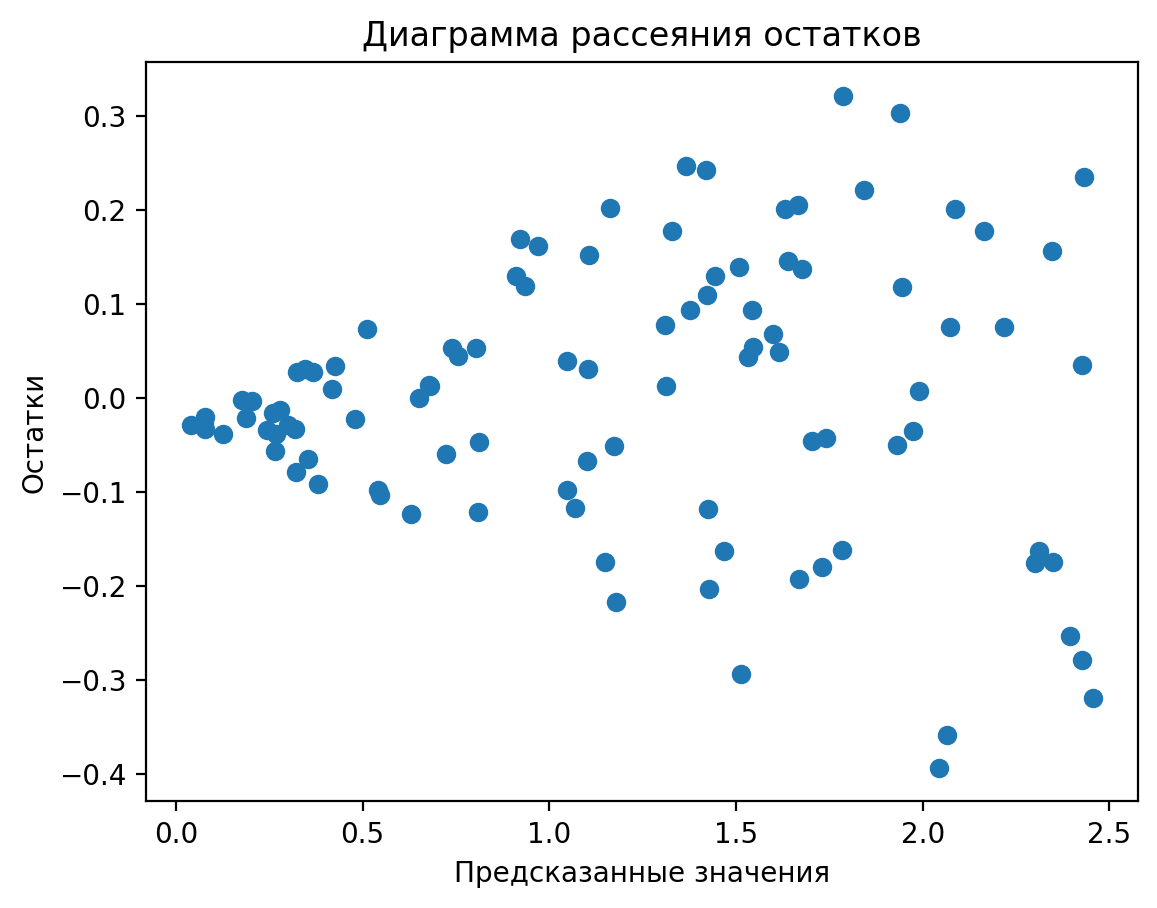

In [72]:

# Визуализация гетероскедастичности
residuals = results.resid
fitted_values = results.fittedvalues

plt.scatter(fitted_values, residuals)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("Диаграмма рассеяния остатков")
plt.show()

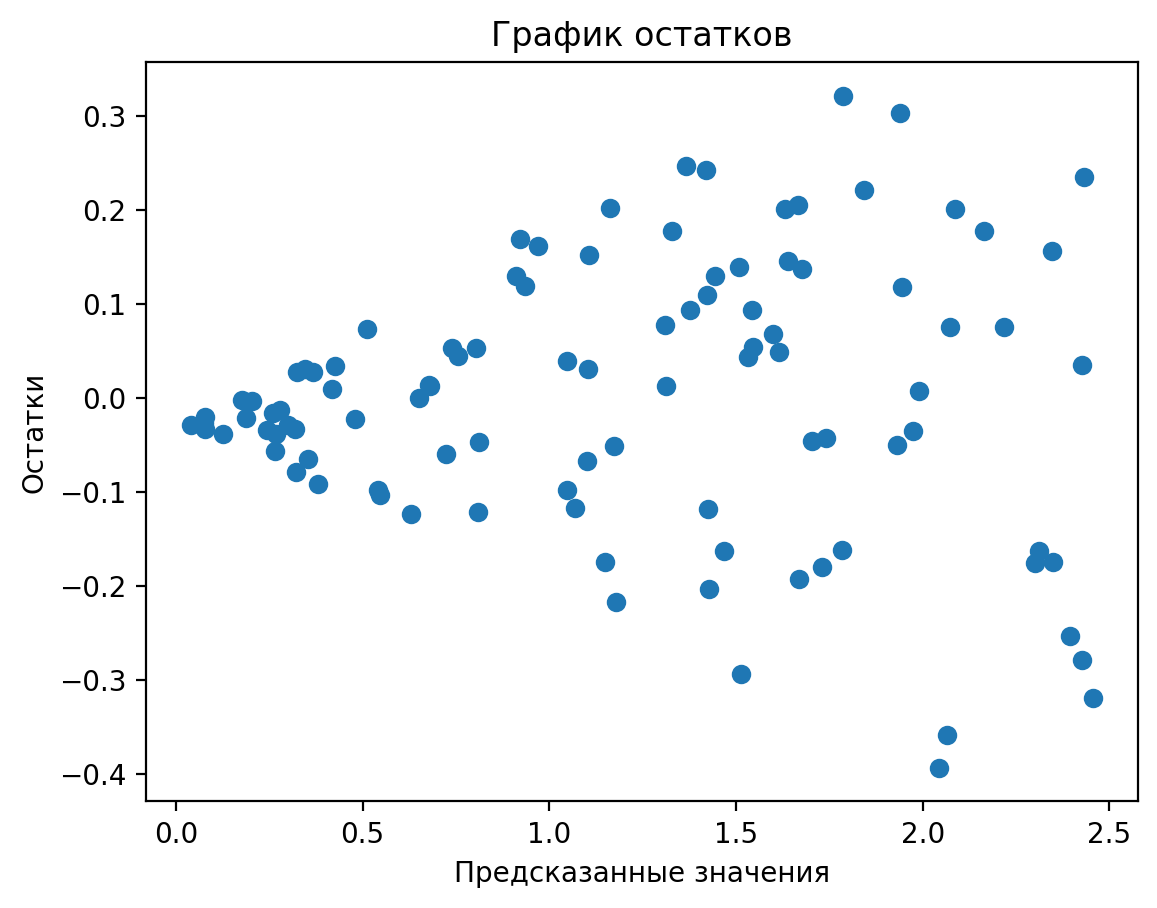

In [73]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Создание случайных данных с гетероскедастичностью
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + np.random.rand(100, 1) * X

# Добавление константы к матрице X
X = sm.add_constant(X)

# Создание модели линейной регрессии
model = sm.OLS(y, X)

# Получение результатов регрессии
results = model.fit()

# Получение остатков
residuals = results.resid

# Визуализация графика остатков
plt.scatter(results.fittedvalues, residuals)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков")
plt.show()


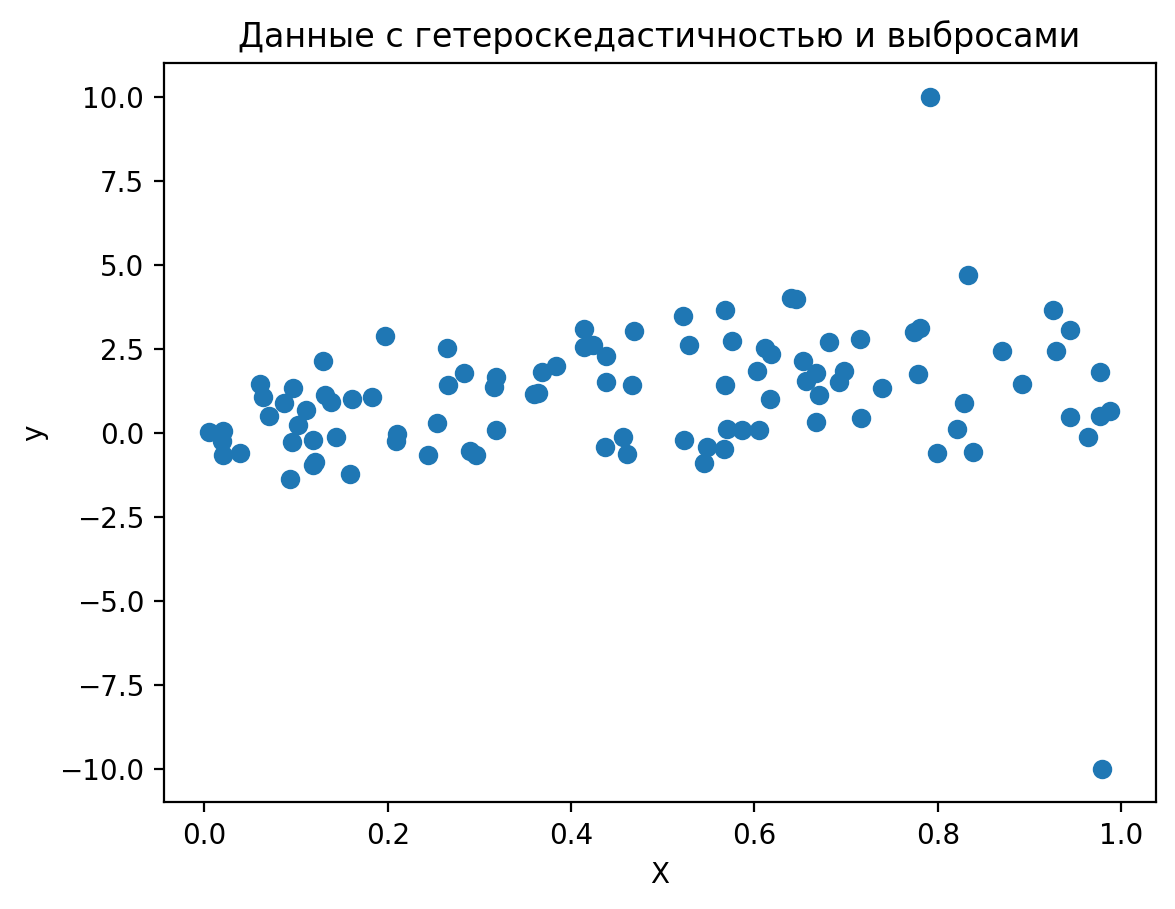

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайных данных с гетероскедастичностью и выбросами
np.random.seed(0)
X = np.random.rand(100)
epsilon = np.random.randn(100) * (1 + X**2)  # Гетероскедастичность
y = 2 * X + epsilon

# Добавление выбросов
y[10] = 10
y[20] = -10

# Визуализация данных
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Данные с гетероскедастичностью и выбросами")
plt.show()


Коэффициент детерминации R2: 0.8433139851195266
Коэффициент детерминации R2: 0.8433139851195266


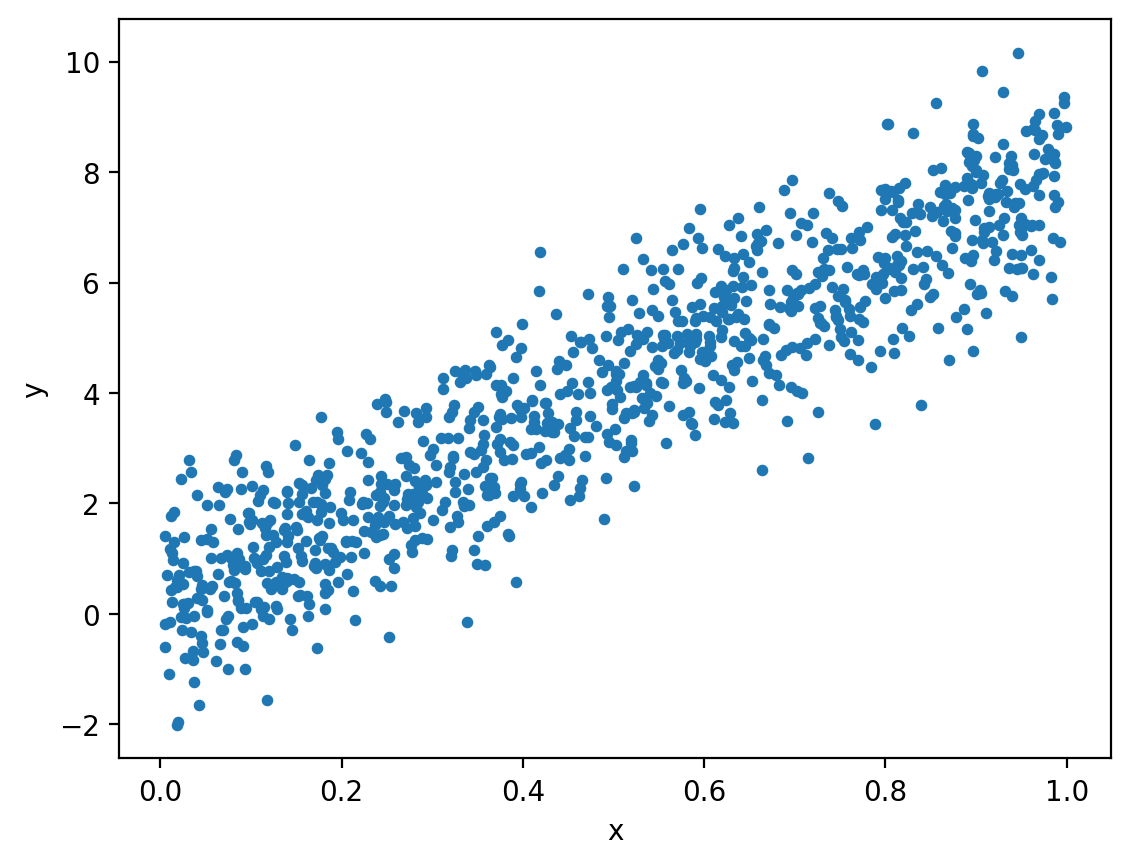

In [154]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Генерация случайных данных
np.random.seed(42)
X = np.random.rand(1000, 1)
y = X*8 + np.random.randn(1000, 1)

# Создание и подгонка модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Вычисление коэффициента детерминации R2
r2 = model.score(X, y)
print("Коэффициент детерминации R2:", r2)
# Или можно использовать функцию r2_score
r2 = r2_score(y, model.predict(X))

print("Коэффициент детерминации R2:", r2)

plt.scatter(X, y, s=10)
#plt.plot(train['x'], y_predict_train, c='g')
df = df.sort_values('x')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

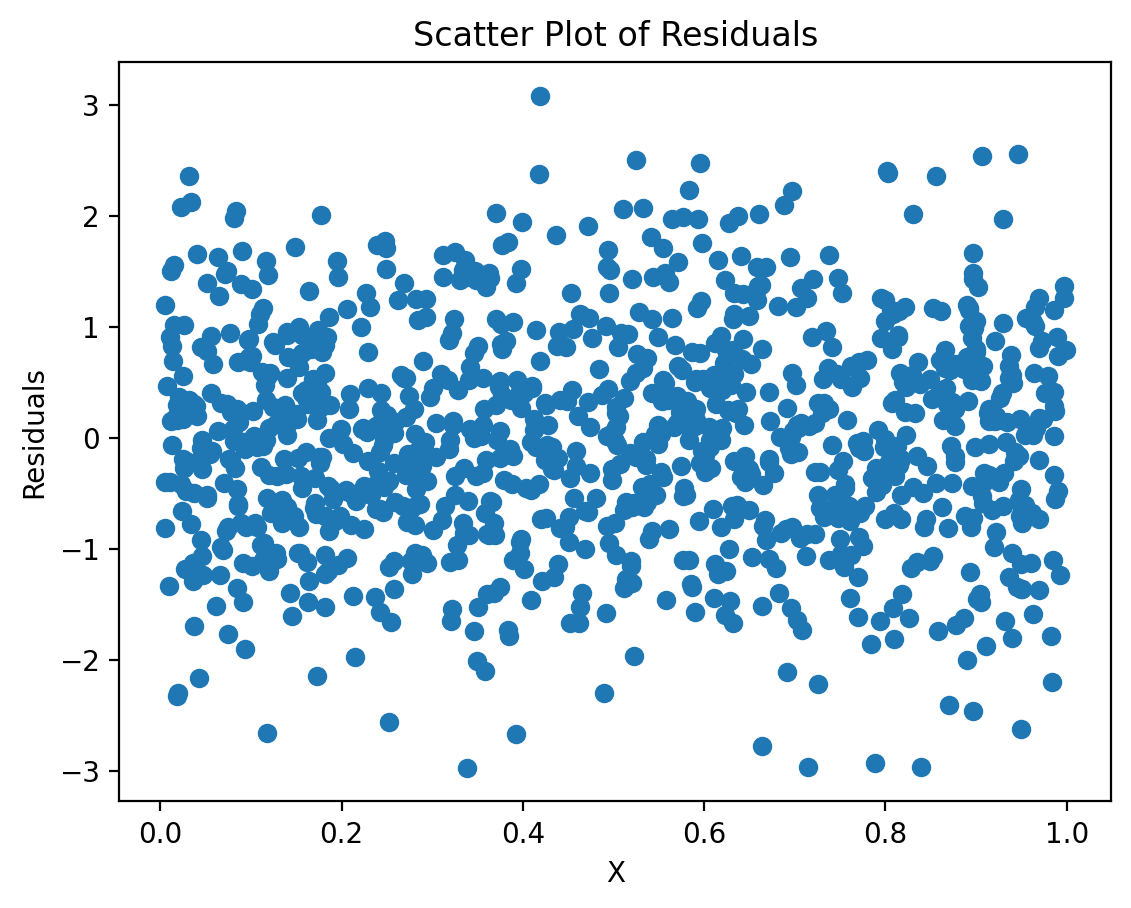

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Получение остатков
residuals = y - model.predict(X)

# Создание диаграммы рассеяния остатков
plt.scatter(X, residuals)
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Residuals')
plt.show()


In [175]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Генерируем случайные данные
np.random.seed(0)
X = np.random.rand(10, 1)
y = 2 * X + np.random.randn(10, 1)

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Вычисляем прогнозные значения
y_pred = model.predict(X)

# Вычисляем сумму квадратов отклонений
ss_total = np.sum((y - np.mean(y))**2)

# Вычисляем сумму квадратов остатков
ss_residual = np.sum((y - y_pred)**2)

# Вычисляем коэффициент детерминации
r_squared = 1 - (ss_residual / ss_total)

print("Коэффициент детерминации (R-squared):", r_squared)
print(y, y_pred)

Коэффициент детерминации (R-squared): 0.24438737870463423
[[ 1.24167058]
 [ 2.88465224]
 [ 1.96656448]
 [ 1.21144138]
 [ 1.29117283]
 [ 1.62546255]
 [ 2.3692535 ]
 [ 1.57838774]
 [ 2.24039322]
 [-0.0872127 ]] [[1.49321491]
 [1.83853591]
 [1.60519043]
 [1.48505734]
 [1.23344208]
 [1.69471032]
 [1.26235946]
 [2.20504363]
 [2.35425424]
 [1.1499775 ]]


In [172]:
import pandas as pd
import numpy as np

# Пример данных
y = [1, 2, 3, 4, 5]
y_pred = [1.2, 2.3, 2.8, 4.1, 4.9]

# Вычисление квадратов отклонений и остатков
deviation_squared = np.square(np.subtract(y, y_pred))
residual_squared = np.square(np.subtract(y_pred, y))

# Создание таблицы
data = {'y': y, 'y_pred': y_pred, 'квадрат отклонений': deviation_squared, 'квадрат остатков': residual_squared}
df = pd.DataFrame(data)

# Вывод таблицы
print(df)


   y  y_pred  квадрат отклонений  квадрат остатков
0  1     1.2                0.04              0.04
1  2     2.3                0.09              0.09
2  3     2.8                0.04              0.04
3  4     4.1                0.01              0.01
4  5     4.9                0.01              0.01


In [168]:
import numpy as np

arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

result = np.subtract(arr1, arr2)
print(result)


[-3 -3 -3]


## Матрица корреляций признаков с целевой переменной

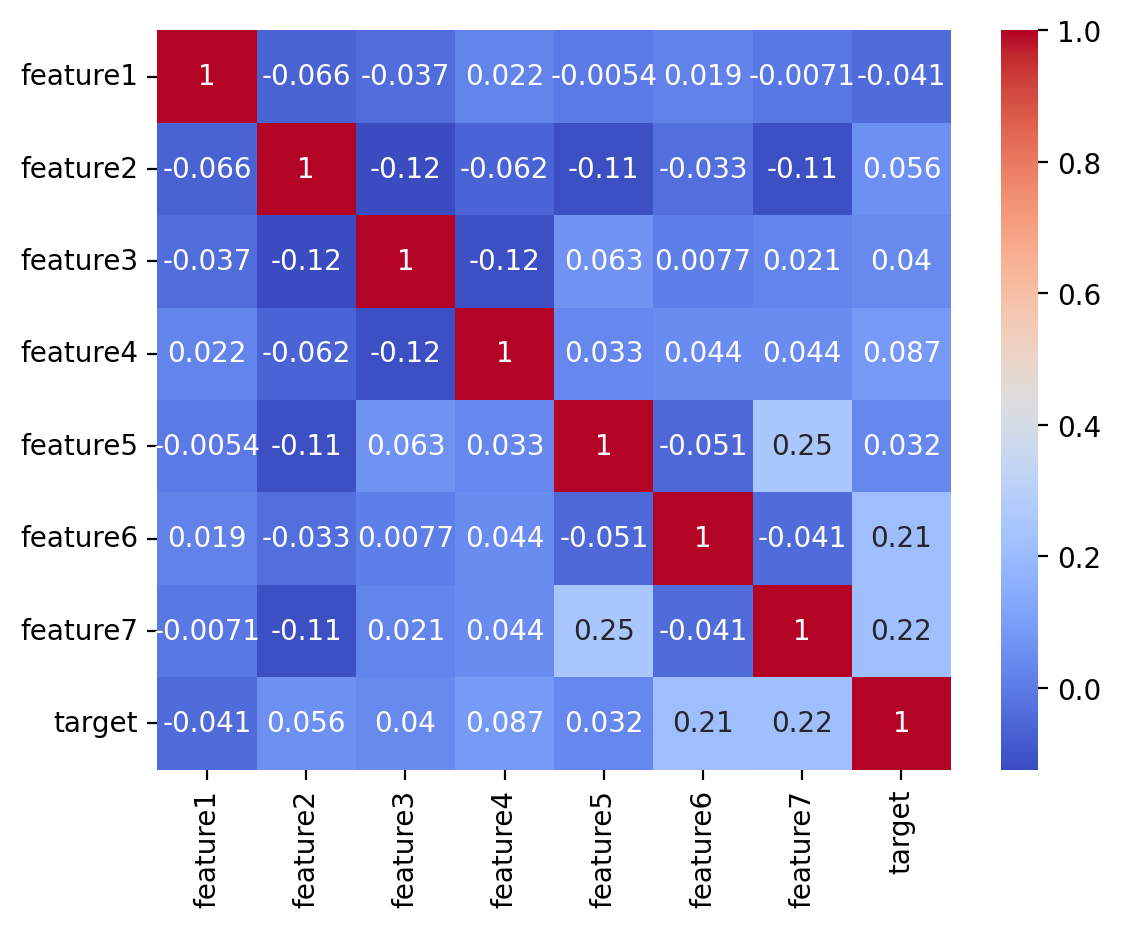

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Создание DataFrame с 7 признаками и целевой переменной
np.random.seed(0)
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'feature4': np.random.rand(100),
    'feature5': np.random.rand(100),
    'feature6': np.random.rand(100),
    'feature7': np.random.rand(100),
    'target': np.random.rand(100)
}
df = pd.DataFrame(data)

# Вычисление матрицы корреляции
correlation_matrix = df.corr()

# Вывод тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


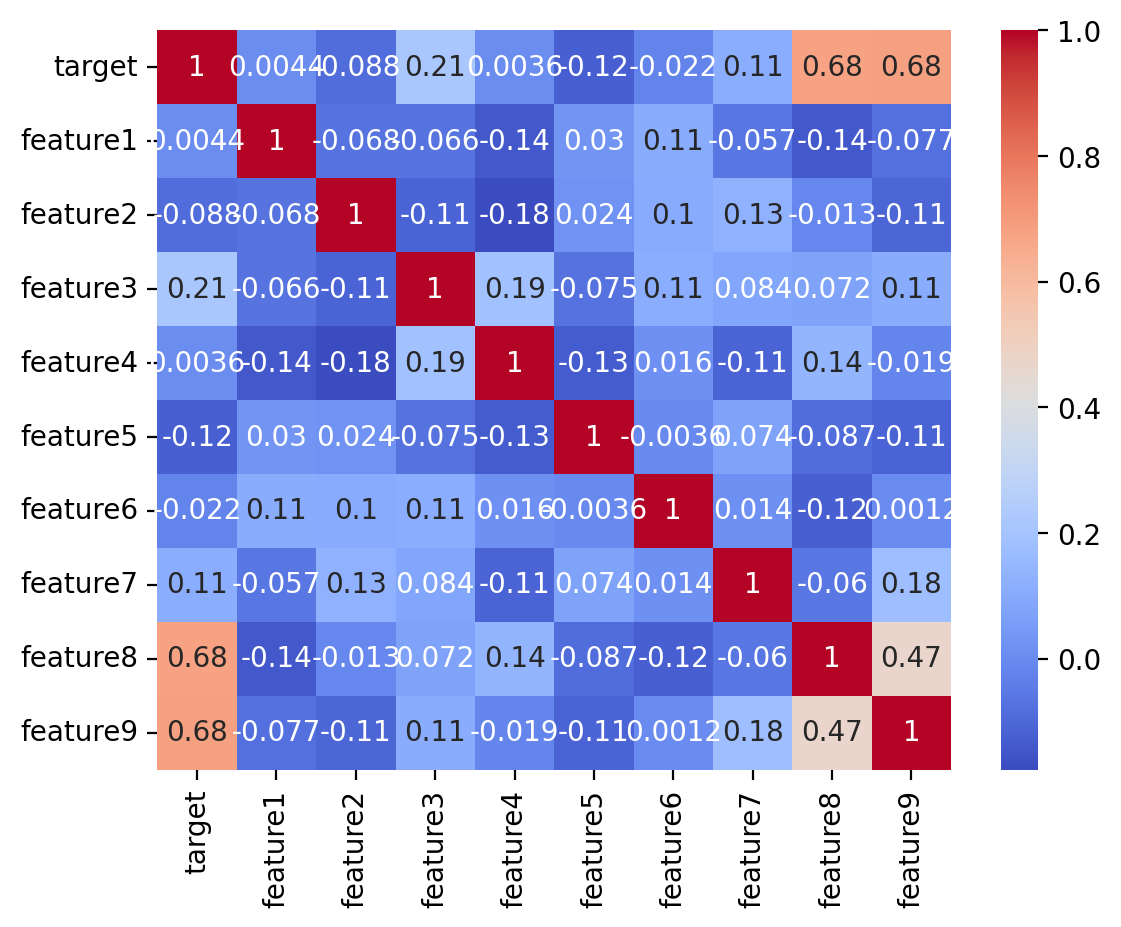

Коэффициенты корреляции признаков:
    feature  coefficient
0  feature1     0.105711
1  feature2    -0.035924
2  feature3     0.131562
3  feature4    -0.072437
4  feature5    -0.040113
5  feature6     0.016162
6  feature7     0.055756
7  feature8     0.385272
8  feature9     0.314602


In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Создание DataFrame с 7 признаками и целевой переменной
np.random.seed()
data = {
    'target': np.random.rand(100),
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'feature4': np.random.rand(100),
    'feature5': np.random.rand(100),
    'feature6': np.random.rand(100),
    'feature7': np.random.rand(100)
    
}
df = pd.DataFrame(data)

# Добавление двух коррелирующих с целевой переменной признаков
df['feature8'] = df['target'] + np.random.rand(100) * 0.9
df['feature9'] = df['target'] + np.random.rand(100) * 1.1

# Вычисление матрицы корреляции
correlation_matrix = df.corr()

# Вывод тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

print('Коэффициенты корреляции признаков:')
# Разделение данных на признаки и целевую переменную
X = df[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9' ]]
y = df['target']

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Вывод коэффициентов модели
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
print(coefficients)